# Imports and Dataset



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
df = pd.read_csv("/content/winter_2024_data.csv")
df.head()

,price,appraisal_offer,make_appraisal,model_appraisal,trim_level_appraisal,model_year_appraisal,mileage_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,...,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,vehicle_type,color,online_appraisal_flag,state,days_since_offer
0,19500,18800,Kia,Sportage,Not Premium,2014,19300,2.4L,4,21.0,...,3,24.0,34.0,134,16,Small SUV,Gray,0.0,CA,0
1,24000,9000,Ford,Escape,Premium,2012,39300,1.6L,4,22.0,...,6,19.0,27.0,271,15,Small SUV,Black,0.0,IL,0
2,24000,9800,Dodge,Challenger,Not Premium,2013,106100,3.6L,6,19.0,...,4,NaN,NaN,248,12,Luxury,White,0.0,CA,0
3,33000,14600,Toyota,Tacoma,Premium,2014,105800,3.5L,6,19.0,...,6,18.0,24.0,380,16,Medium SUV,Black,1.0,CA,1
4,14200,19500,Jeep,Cherokee,Not Premium,2015,20400,2.4L,4,22.0,...,4,NaN,NaN,188,14,Small SUV,Gold,0.0,FL,0


# Preprocessing


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df["vehicle_type_appraisal"]= label_encoder.fit_transform(df["vehicle_type_appraisal"])

df['avg_mpg'] = df[['mpg_city_appraisal', 'mpg_highway_appraisal']].mean(axis=1)


columns_for_kmeans = ["vehicle_type_appraisal"]
data = df[columns_for_kmeans]
price = df[["price"]]
data = data.dropna()

# Choosing clusters

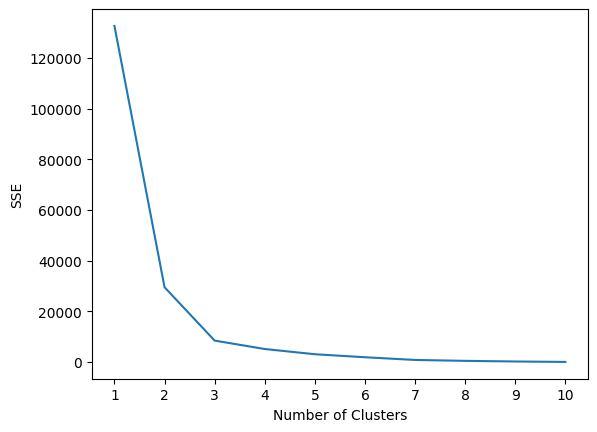

In [ ]:
scaled_df = StandardScaler().fit_transform(data)

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# K-means

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#append cluster assingments to original DataFrame
data['cluster'] = labels = kmeans.labels_

#view updated DataFrame
data = data.sort_values(by=['cluster'])
#data.to_csv("kmeans_results_no_mileage.csv")

data.groupby('cluster').mean()


,vehicle_type_appraisal
cluster,
0,4.201793
1,4.156739
2,4.097516


# Graphing

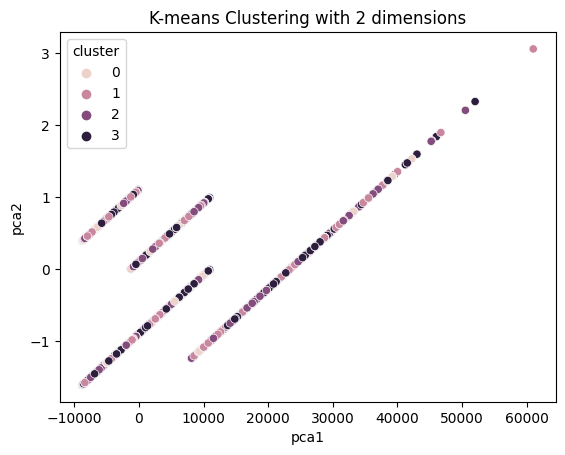

In [ ]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data.iloc[:,1:12])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# Checking Brand Loyalty

In [ ]:
df["brand_loyal"] = df["make_appraisal"] == df["make"]
df.loc[df["mileage_appraisal"] >= 100000, "high_mileage"] = True
df.loc[df["mileage_appraisal"] < 100000, "high_mileage"] = False
df["high_mileage"].value_counts()
#df["brand_loyal"].value_counts() # 26306/132717 = .198
#df["brand_loyal"][df["high_mileage"] == True].value_counts() # 8842/38918 = .227
df["brand_loyal"][df["high_mileage"] == False].value_counts() # 17464/93799 = .186

False    76335
True     17464
Name: brand_loyal, dtype: int64

# Checking Type Loyalty

In [ ]:
df["type_loyal"] = df["vehicle_type_appraisal"].str.strip() == df["vehicle_type"].str.strip()
df.loc[df["mileage_appraisal"] >= 100000, "high_mileage"] = True
df.loc[df["mileage_appraisal"] < 100000, "high_mileage"] = False
#df[["vehicle_type_appraisal","vehicle_type","type_loyal"]]
#df["type_loyal"].value_counts() # 41431/132717 = .312
#df["type_loyal"][df["high_mileage"] == True].value_counts() # 13527/38918 = .348
df["type_loyal"][df["high_mileage"] == False].value_counts() # 27904/93799 = .297

False    65895
True     27904
Name: type_loyal, dtype: int64